In [1]:
from MLPW.arc.smld import DSM, DSM_discreteT_1, DSM_discreteT_2, DSM_discreteT_2_broken_loss, DSM_continous_2
from MLPW.arc.smld import langevin_sampling, annealed_langevin_sampling, annealed_langevin_sampling_sigma
from MLPW.data.manifold import SwissRoll_DataModule
from lightning import Trainer
import numpy as np
import torch


一些经验：

1. 并不是所有系数都不重要：可以采用sigma修正的sampling，但是采样step和noise 的sigma必须匹配
2. 在learning的时候，尽管数学上是等价的，需要避免/sigma其中sigma为小量的情况，这会让模型的训练变得困难，生成效果不好
3. 选择合适的sigma对生成效果提升很显著，在退火方法中，sigma偏离此值的sampling过程实际意义非常有限
4. 虽然理论上t是连续的，但连续的t会让模型更难训练，一般在离散的t空间采样


In [2]:
import matplotlib.pyplot as plt
def plot(x):
    plt.figure(figsize=[6, 6])
    plt.scatter(x[:, 0],x[:, 1],s=1)
    plt.show()
    plt.close()

In [3]:
dsm = DSM()
dsm_discreteT_1 = DSM_discreteT_1()
dsm_discreteT_2 = DSM_discreteT_2()
dsm_discreteT_2_broken_loss = DSM_discreteT_2_broken_loss()
trian_loader = SwissRoll_DataModule().get_train_loader()

In [4]:
trainer = Trainer(max_epochs=50)
trainer.fit(dsm, trian_loader)


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/jiayi/.local/share/virtualenvs/MLPW-mOq2XAYX/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
/Users/jiayi/.local/share/virtualenvs/MLPW-mOq2XAYX/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name | Type | Params | Mode 
--------------------------------------
0 | net  | MLP  | 27.9 K | t

Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 212.40it/s, v_num=101]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 209.47it/s, v_num=101]


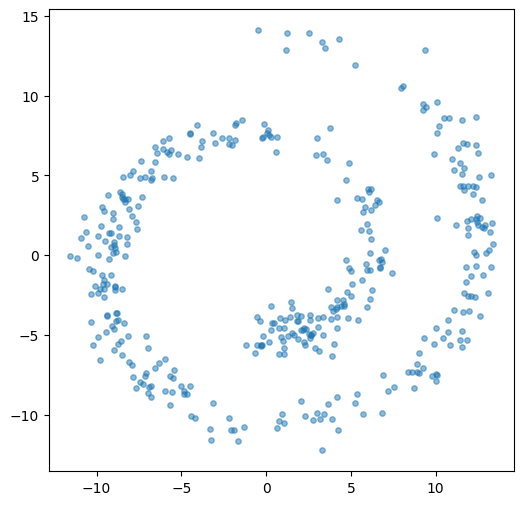

In [5]:
x = langevin_sampling(dsm)
plot(x)

In [8]:
trainer = Trainer(max_epochs=50)
trainer.fit(dsm_discreteT_1, trian_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | MLP  | 28.0 K | train
---------------------------------------
28.0 K    Trainable params
0         Non-trainable params
28.0 K    Total params
0.112     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 188.21it/s, v_num=126]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 185.97it/s, v_num=126]


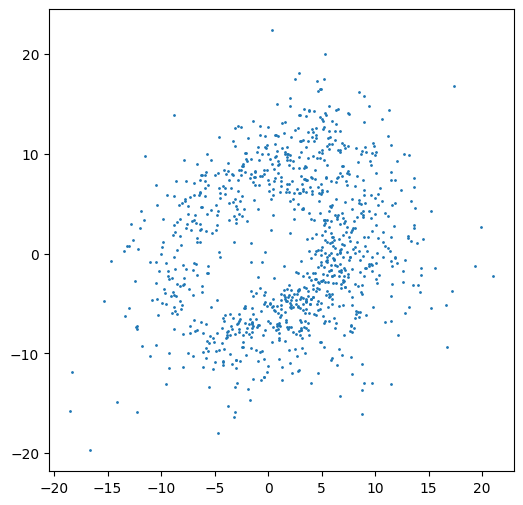

In [10]:
x = annealed_langevin_sampling_sigma(dsm_discreteT_1, n_samples=1000,  T=100)
plot(x)

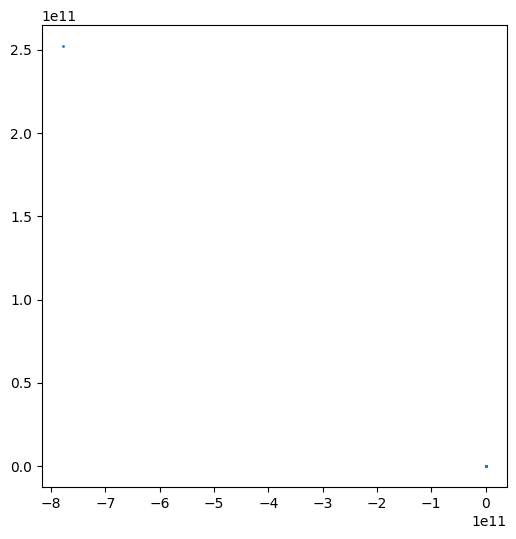

In [11]:
x = annealed_langevin_sampling_sigma(dsm_discreteT_1, n_samples=1000,  T=1000)
plot(x)

In [12]:
trainer = Trainer(max_epochs=50)
trainer.fit(dsm_discreteT_2, trian_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type            | Params | Mode 
--------------------------------------------------
0 | model | TimeEmbeddedMLP | 32.8 K | train
--------------------------------------------------
32.8 K    Trainable params
0         Non-trainable params
32.8 K    Total params
0.131     Total estimated model params size (MB)
12        Modules in train mode
0         Modules in eval mode


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 142.00it/s, v_num=127]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 140.35it/s, v_num=127]


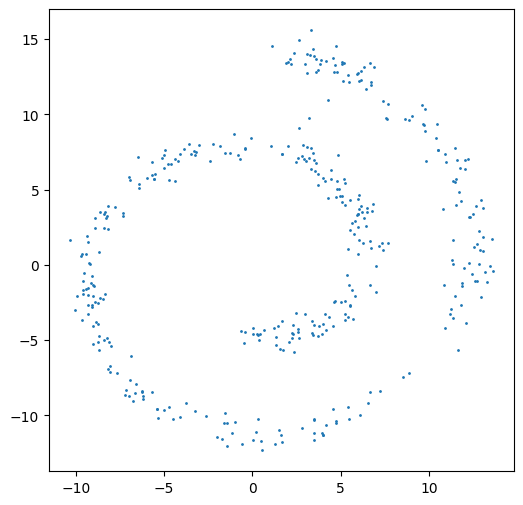

In [13]:
x = annealed_langevin_sampling_sigma(dsm_discreteT_2)
plot(x)

In [ ]:
trainer = Trainer(max_epochs=50)
trainer.fit(dsm_discreteT_2_broken_loss, trian_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/jiayi/.local/share/virtualenvs/MLPW-mOq2XAYX/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type            | Params | Mode 
--------------------------------------------------
0 | model | TimeEmbeddedMLP | 32.8 K | train
--------------------------------------------------
32.8 K    Trainable params
0         Non-trainable params
32.8 K    Total params
0.131     Total estimated model params size (M

Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 162.53it/s, v_num=124]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 160.47it/s, v_num=124]


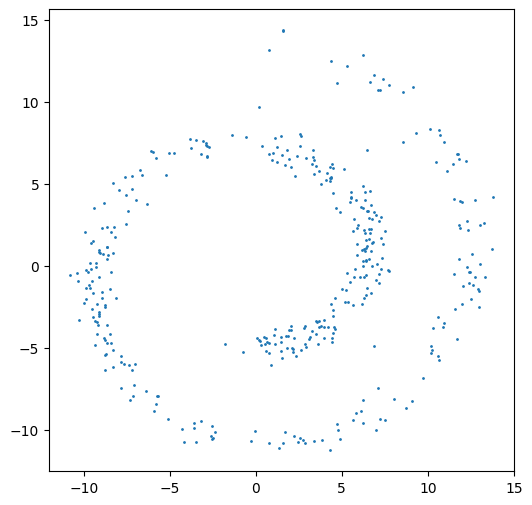

In [6]:
x = annealed_langevin_sampling_sigma(dsm_discreteT_2_broken_loss)
plot(x)

In [4]:
# 验证结论1
sigma_min = 0.1
sigma_max = 10
num_scales = 5
models = []

trian_loader = SwissRoll_DataModule().get_train_loader()
for sigma in np.exp(np.linspace(np.log(sigma_min), np.log(sigma_max), num_scales)):
    model = DSM(sigma=sigma)
    trainer = Trainer(max_epochs=50)
    trainer.fit(model, trian_loader)
    models.append(model)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/jiayi/.local/share/virtualenvs/MLPW-mOq2XAYX/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name | Type | Params | Mode 
--------------------------------------
0 | net  | MLP  | 27.9 K | train
--------------------------------------
27.9 K    Trainable params
0         Non-trainable params
27.9 K    Total params
0.112     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
/Users/jiayi/.local/share/virtualenvs/MLPW-mOq2XAYX/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve

Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 176.47it/s, v_num=118]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 174.46it/s, v_num=118]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type | Params | Mode 
--------------------------------------
0 | net  | MLP  | 27.9 K | train
--------------------------------------
27.9 K    Trainable params
0         Non-trainable params
27.9 K    Total params
0.112     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 167.35it/s, v_num=119]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 165.47it/s, v_num=119]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type | Params | Mode 
--------------------------------------
0 | net  | MLP  | 27.9 K | train
--------------------------------------
27.9 K    Trainable params
0         Non-trainable params
27.9 K    Total params
0.112     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 183.24it/s, v_num=120]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 180.79it/s, v_num=120]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type | Params | Mode 
--------------------------------------
0 | net  | MLP  | 27.9 K | train
--------------------------------------
27.9 K    Trainable params
0         Non-trainable params
27.9 K    Total params
0.112     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode



Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 181.32it/s, v_num=121]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 179.21it/s, v_num=121]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type | Params | Mode 
--------------------------------------
0 | net  | MLP  | 27.9 K | train
--------------------------------------
27.9 K    Trainable params
0         Non-trainable params
27.9 K    Total params
0.112     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 185.72it/s, v_num=122]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 183.46it/s, v_num=122]


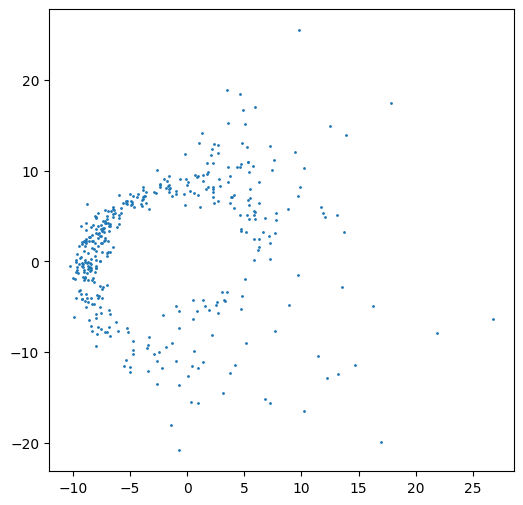

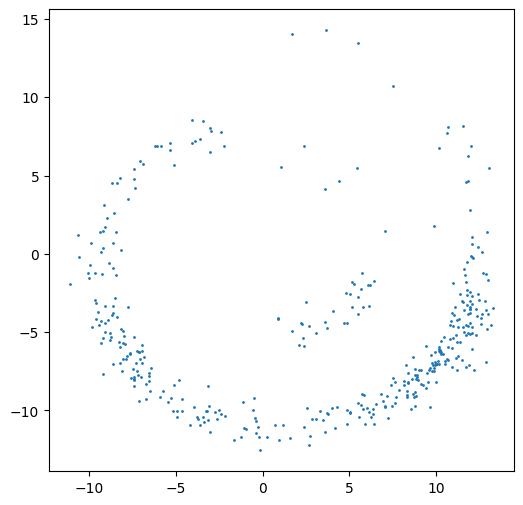

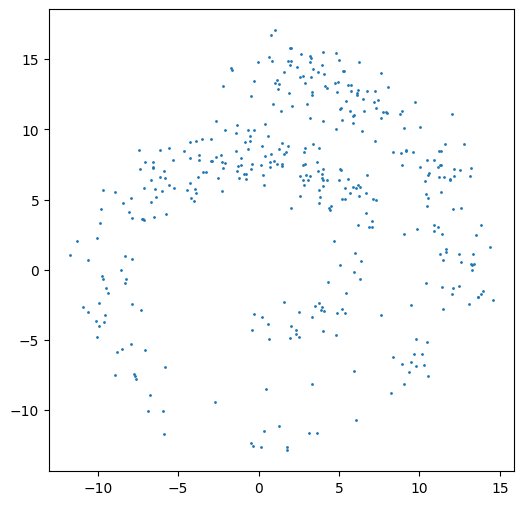

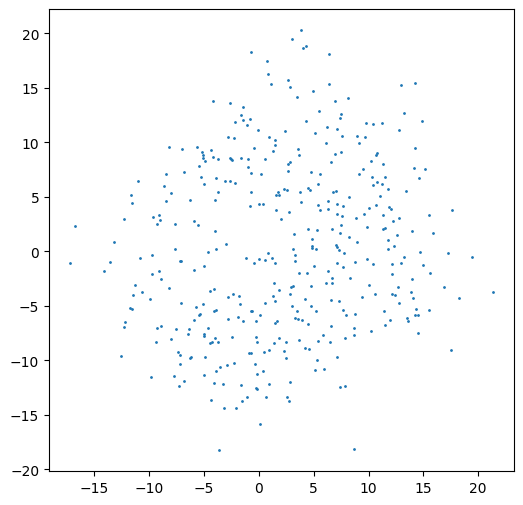

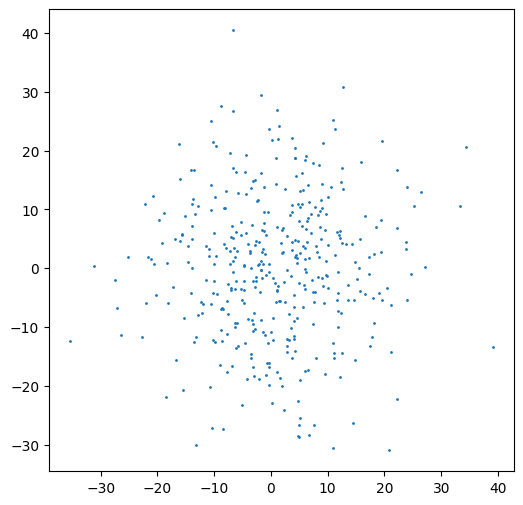

In [7]:
for model in models:
    x = langevin_sampling(model)
    plot(x)

In [3]:
dsm___ = DSM_continous_2()
trainer = Trainer(max_epochs=50)
trian_loader = SwissRoll_DataModule().get_train_loader()
trainer.fit(dsm___, trian_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/jiayi/.local/share/virtualenvs/MLPW-mOq2XAYX/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type            | Params | Mode 
--------------------------------------------------
0 | model | TimeEmbeddedMLP | 32.8 K | train
--------------------------------------------------
32.8 K    Trainable params
0         Non-trainable params
32.8 K    Total params
0.131     Total estimated model params size (M

Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 144.66it/s, v_num=130]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 98/98 [00:00<00:00, 142.89it/s, v_num=130]


In [6]:
@torch.no_grad()
def annealed_langevin_sampling_(model, n_samples=400, T=100, eta=0.1, device='cpu'):
    sigmas = np.exp(np.linspace(np.log(model.sigma_min), np.log(model.sigma_max), 10))
    x = (torch.rand(n_samples, 2, device=device) - 0.5) * 30

    for t in reversed(range(len(sigmas))):
        sigma = sigmas[t].item()
        for _ in range(T):
            noise = torch.randn_like(x)
            t_index = torch.full((x.size(0), 1), t, dtype=torch.long, device=device)
            grad = model(x, t_index)
            x = x + eta* grad + torch.sqrt(torch.tensor(2 * eta)) * noise
    return x

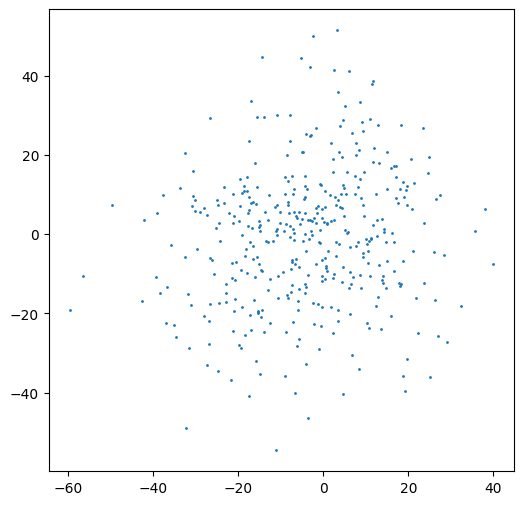

In [8]:
x = annealed_langevin_sampling_(dsm___)
plot(x)